<a href="https://colab.research.google.com/github/OSGeoLabBp/tutorials/blob/master/english/data_processing/lessons/circle.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Regression circle

How can we fit a circle on four or more points?

First let's try the least squares method (LSM) to find a solution.

Unfortunately the equation of the circle is not linear:

${(x - x_0)}^{2} + {(y - y_0)}^{2} = r^2$

We have x and y positions of points on the circle, and we would like to find $x_0, y_0, r$.
Removing the bracket we get:

$x^2 - 2 x x_0 + {x_0}^2 + y^2 -2 y y_0 + {y_0}^2 = r^2$

Let's reorder the tags:

$y^2 + x^2  -2 x_0 x -2 y_0 y + x_0^2 + y_0^2 -r^2 = 0$

Lest substitute the unknowns:

$a_1 = -2 x_0$

$a_2 = -2 y_0$

$a_3 = x_0^2 + y_0^2 - r^2$

$x a_1 + y a_2 + a_3 =  -(x^2 + y^2)$

So we get a linear equation of three unknowns $a_1, a_2, a_3$ for each measured point, 
which is solved applying LSM using numpy.

Finally we can calculate the original unknowns:

$x_0 = -0.5 a_1$

$y_0 = -0.5 a_2$

$r = \sqrt {x_0^2 + y_0^2 - a_3}$

In [ ]:
from math import sqrt, pi, sin, cos, sqrt, log   # used mathematical and trigonometrical functions
import numpy as np                          # matrix operations
import matplotlib.pyplot as plt             # chart plotting

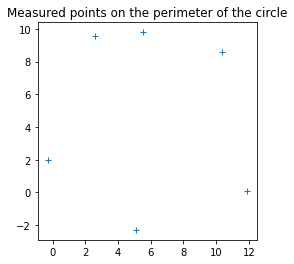

In [ ]:
# sample data
x = np.array([ 11.88, 10.34, 2.58, -0.29, 5.1, 5.5])
y = np.array([  0.08,  8.59, 9.54,  1.95, -2.3, 9.8 ])
plt.plot(x, y, '+')
plt.axis('scaled')
_ = plt.title('Measured points on the perimeter of the circle')

Setting up and solving the equation system

$A x = b$

\begin{align}
        x = \begin{pmatrix}
            a_1 \\
            a_2 \\
            a_3 
            \end{pmatrix}.
\end{align}

\begin{align}
        A = \begin{pmatrix}
            x_1 & y_1 & 1 \\
            x_2 & y_2 & 1 \\
            x_3 & y_3 & 1 \\
            x_4 & y_4 & 1 \\
            x_5 & y_5 & 1 \\
            x_6 & y_6 & 1 
        \end{pmatrix}.
\end{align}

\begin{align}
    b = - \begin{pmatrix}
        x_1^2 + y_1^2 \\
        x_1^2 + y_1^2 \\
        x_1^2 + y_1^2 \\
        x_1^2 + y_1^2 \\
        x_1^2 + y_1^2 \\
        x_1^2 + y_1^2
    \end{pmatrix}.
\end{align}

Note in the formula above the matrix indices start from 1 while in Python they start from 0.

In [ ]:
# coefficients of unknowns
A = np.stack((x, y, np.full(x.size, 1.0)), axis=1)
# pure terms
b = -(x * x + y * y)
# solution for a1, a2, a3
Q = np.linalg.inv(np.matmul(A.T, A))
par = np.matmul(Q, np.matmul(A.T, b))
# calculating the original unknowns
x0 = -0.5 * par[0]
y0 = -0.5 * par[1]
r = sqrt(x0**2 + y0**2 - par[2])
print("The equation of the circle")
print(f"(x - {x0:.3f})^2 + (y - {y0:.3f})^2 = {r:.3f}")

The equation of the circle
(x - 6.128)^2 + (y - 3.729)^2 = 6.495


Accuracy can be described by the residuals from the original equations:

$res = \sqrt{{(x - x_0)}^{2} + {(y - y_0)}^{2}} - r$

In [ ]:
# residuals
res = np.sqrt((x - x0)**2 + (y - y0)**2) -r
print("residuals:")
print([f"{v:.3f} " for v in res])

residuals:
['0.316 ', '-0.063 ', '0.314 ', '0.165 ', '-0.380 ', '-0.392 ']


and by the root mean square error:

$rms = \sqrt {\frac {\sum{res^2}} {n}}$

In [ ]:
#root mean square error
rms = sqrt(np.mean(res**2))
print(f"rms: {rms:.3f} m")

rms: 0.296 m


Let's display points and circle

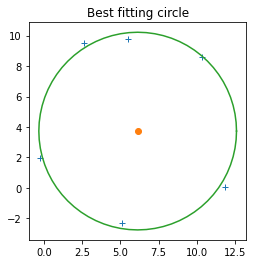

In [ ]:
plt.plot(x, y, '+')
plt.plot(x0, y0, 'o')
plt.plot([x0 + r * cos(alfa / 180 * pi) for alfa in range(0, 361, 5)],
         [y0 + r * sin(alfa / 180 * pi) for alfa in range(0, 361, 5)])
plt.axis('scaled')
_ = plt.title("Best fitting circle")

Let's calculate the estimated accuracy of the unknowns $a_1, a_2, a_3$. The weight coefficient matrix of unknowns  is the inverse of normal matrix:
$Q = {N}^{-1}=(A^TA)^{-1}$

The mean error of unit weight (called as proportionality factor, too):

$c^2 = \frac {\sum{v^2}} {(n-3)}$ where $v = Ax -l$

The variance and covariance matrix:

$C=c^2Q$

The square of the standard deviation of unkowns ${a_1, a_2, a_3}$ are in the diagonal of the variance and covariance matrix. 

Applying the error propagation law, we can get the standard deviation of ${x_0}$, ${y_0}$ and ${r}$. The matrix containg the partial derivatives of the functions to compute ${x_0}$, ${y_0}$ and ${r}$ from ${a_1}$, ${a_2}$ and ${a_3}$:

$F^T=\begin{bmatrix} -0.5 & 0 & 0 \\ 0 & -0.5 & 0 \\ \frac {1} {4r}a_1 & \frac {1} {4r}a_2 & -\frac {1} {r} \end{bmatrix}=\begin{bmatrix} -0.5 & 0 & 0 \\ 0 & -0.5 & 0 \\ -\frac {x_0} {2r} & -\frac {y_0} {2r} & -\frac {1} {2r} \end{bmatrix}$

The variance and covariance matrix of ${x_0}$, ${y_0}$ and ${r}$:

$C_Y=F^TCF$

The variances of ${x_0}$, ${y_0}$ and ${r}$ are in the diagonal of $C_Y$.

In [ ]:
# residuals computed from a1, a2, a3
resa = np.dot(A, par) - b
print("residuals:")
print([f"{v:.3f} " for v in resa])
c2 = np.sum(resa**2) / (np.size(x)-3)
C = c2 * Q
F = np.array([ [-0.5, 0, 0], [0, -0.5, 0], [1/4/r*par[0], 1/4/r*par[1], -1/2/r] ]).T
C_Y = np.matmul(np.matmul(F.T, C), F)
print(f"stdev_x0: {sqrt(C_Y[0][0]):.3f} m  stdev_y0: {sqrt(C_Y[1][1]):.3f} m  stdev_r: {sqrt(C_Y[2][2]):.3f} m")

residuals:
['4.201 ', '-0.821 ', '4.174 ', '2.169 ', '-4.790 ', '-4.934 ']
stdev_x0: 0.263 m  stdev_y0: 0.227 m  stdev_r: 0.173 m


# Robust estimation of circle parameters using RANSAC

What happens if we have one or more outliers among the points? If we have few points we can find outlier from a figure or we can use data snooping. Using laser scanners or photogrammetry we get point clouds where there are huge number of points and usually many outliers/noise.

This case Random Sample Consensus (RANSAC) comes into consideration.

Let's create first a function to get the best fitting (LSM) circle through 3 or more points.

In [ ]:
def circle(x, y):
    """ circle through points
        returns tuple of x0, y0, r
    """
    # coefficients of unknowns
    A = np.stack((x, y, np.full(x.size, 1.0)), axis=1)
    # pure term
    b = -(x * x + y * y)
    # solution for a1, a2, a3
    Q = np.linalg.inv(np.matmul(A.T, A))
    par = np.matmul(Q, np.matmul(A.T, b))
    # calculating the original unknowns
    x0 = -0.5 * par[0]
    y0 = -0.5 * par[1]
    r = sqrt(x0**2 + y0**2 - par[2])
    #residuals
    res = np.sqrt((x - x0)**2 + (y - y0)**2) -r
    #root mean square error
    rms = sqrt(np.mean(res**2))
    return x0, y0, r, rms

Test the function using point from the first section.

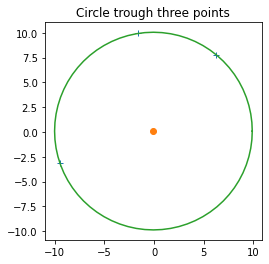

In [ ]:
# circle through three points
x0, y0, r, rms = circle(x[0:3], y[0:3])
plt.plot(x[:3], y[:3], '+')
plt.plot(x0, y0, 'o')
plt.plot([x0 + r * cos(alfa / 180 * pi) for alfa in range(0, 361, 5)],
         [y0 + r * sin(alfa / 180 * pi) for alfa in range(0, 361, 5)])
plt.axis('scaled')
_ = plt.title("Circle trough three points")

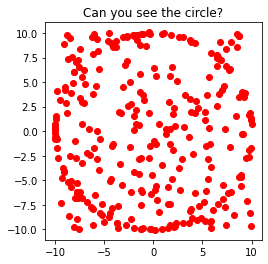

In [ ]:
# generating test data
from random import random, seed, randint
seed()
# random points on circle
n = 100    # number of points on the circle
m = 200    # number of outlier points 
r_range = 0.2
r_base = 10.0
x = np.zeros(n+m)
y = np.zeros(n+m)
# points close to circle
for i in range(n):
    alpha = random() * pi * 2   # angle between 0-360 degree in radians
    r = r_base + (random() - 0.5) * r_range   # random radius
    x[i] = r * sin(alpha)
    y[i] = r * cos(alpha)
# outlier (random) points
for i in range(n, n+m):
    x[i] = random() * 2 * r_base -r_base
    y[i] = random() * 2 * r_base -r_base
plt.plot(x, y, 'ro')
plt.title("Can you see the circle?")
_ = plt.axis('scaled')

Fit circle to randomly selected three points several times and choose the one which is close to the most points. Try to run the code several times and evaluate the results.

In [ ]:
# RANSAC run this block several times and exemine the results
p = 0.99 # needed probability for RANSAC result
n_try = int(log(1 - p) / log(1 - (n / (n + m))**3))
print(f"Estimated number of neccesary iterations: {n_try}")
best = 0
print("centerx  centery   radius    fit   iter")
for i in range(n_try):
    index = [randint(0, n+m-1) for i in range(3)]    # three random index
    x3 = x[index]   # three random points
    y3 = y[index]
    xc, yc, r3, rms = circle(x3, y3)
    # distance from the circle
    dist = np.absolute(np.sqrt((x - xc)**2 + (y - yc)**2) - r3)
    n_fit = dist[dist < r_range/2].size
    #print(index, i, n_fit)
    if n_fit > best:
        best = n_fit
        best_xc = xc
        best_yc = yc
        best_r = r3
        print(f"{best_xc:7.3f}  {best_yc:7.3f}  {best_r:7.3f}  {best:5d}  {i:5d}")

Estimated number of neccesary iterations: 122
centerx  centery   radius    fit   iter
 -0.690   -7.952    4.559      5      0
 -0.321   -0.300    9.658     37      2
 -0.225   -0.037    9.812     43     27
  0.045    0.054   10.020     74     37


# of inliers: 74
# of outliers: 226


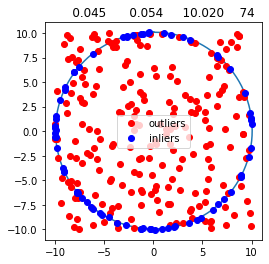

In [ ]:
# plot result
plt.title(f"{best_xc:10.3f} {best_yc:10.3f} {best_r:10.3f} {best:5d}")
plt.plot([best_xc + best_r * sin(alfa / 180 * pi) for alfa in range(0, 361)],
         [best_yc + best_r * cos(alfa / 180 * pi) for alfa in range(0, 361)])
dist = np.absolute(np.sqrt((x - best_xc)**2 + (y - best_yc)**2) - best_r)
nin = x[dist < r_range/2].size
print(f"# of inliers: {nin:d}")
print(f"# of outliers: {n+m-nin:d}")
plt.plot(x[dist > r_range/2], y[dist > r_range/2], "ro", label='outliers')
plt.plot(x[dist < r_range/2], y[dist < r_range/2], "bo", label="inliers")
plt.axis('scaled')
_ = plt.legend()

Finaly, let's fit LSM circle to the inliers.

In [ ]:
xc_final, yc_final, r_final, rms_final = circle(x[dist < r_range/2], y[dist < r_range/2])
print(f"x0: {xc_final:6.3f}, y0: {yc_final:6.3f}, r: {r_final:6.3f}, rms: {rms_final:6.3f}")

x0:  0.035, y0:  0.027, r: 10.017, rms:  0.044


Let's compute the standard deviations of ${x_0}$, ${y_0}$ and ${r}$!

In [ ]:
def circle_quality(n, A, b, par, r, Q):
  # residuals computed from a1, a2, a3
  resa = np.dot(A, par) - b
  c2 = np.sum(resa**2) / (n - 3)
  C = c2 * Q
  F = np.array([ [-0.5, 0, 0], [0, -0.5, 0], [1/4/r*par[0], 1/4/r*par[1], -1/2/r] ]).T
  C_Y = np.matmul(np.matmul(F.T, C), F)
  return C_Y

def circle_with_quality(x, y):
    """ circle through points
        returns tuple of x0, y0, r
    """
    # coefficients of unknowns
    A = np.stack((x, y, np.full(x.size, 1.0)), axis=1)
    # pure term
    b = -(x * x + y * y)
    # solution for a1, a2, a3
    Q = np.linalg.inv(np.matmul(A.T, A))
    par = np.matmul(Q, np.matmul(A.T, b))
    # calculating the original unknowns
    x0 = -0.5 * par[0]
    y0 = -0.5 * par[1]
    r = sqrt(x0**2 + y0**2 - par[2])
    #residuals
    res = np.sqrt((x - x0)**2 + (y - y0)**2) -r
    #root mean square error
    rms = sqrt(np.mean(res**2))
    C_Y = circle_quality(x.size, A, b, par, r, Q)
    return x0, y0, r, rms, sqrt(C_Y[0][0]), sqrt(C_Y[1][1]), sqrt(C_Y[2][2]), x.size


xc_final, yc_final, r_final, rms_final, xc_st, yc_st, r_st, nin = circle_with_quality(x[dist < r_range/2], y[dist < r_range/2])
print(f"x0: {xc_final:6.3f} +/- {xc_st:.3f} m, y0: {yc_final:6.3f} +/- {yc_st:.3f} m, r: {r_final:6.3f} +/- {r_st:.3f} m")
print(f"rms: {rms_final:6.3f} m, # of inliers: {nin:d}")

x0:  0.035 +/- 0.008 m, y0:  0.027 +/- 0.007 m, r: 10.017 +/- 0.005 m
rms:  0.044 m, # of inliers: 74
